# <font color=darkbrown> FORECASTING ASSIGNMENT. </font><br>
## <font color=red> PROBLEM STATEMENT. </font>
#### Forecast the Airlines prices.<br>Prepare a document for each model.<br>Explaining, how many dummy variables you have created and RMSE value for each model.<br><Br>Finally which model you will use for Forecasting.<br>


# <font color= red> EDA.

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [122]:
Forecast = pd.read_excel('Airlines+Data.xlsx')
Forecast

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [123]:
Forecast.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# <font color= red> DATA PREPROCESSING. </font><br>
## <font color= red> FEATURE ENGINEERING.</font>
### Separating Month and Year into Separate Column for Visualization.

In [129]:
#Renaming the col name 
Forecast.rename(columns = {'Month':'Date'}, inplace = True)
Forecast.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [132]:
Forecast["Date"] = pd.to_datetime(Forecast.Date,format="%b-%y")
Forecast["month"] = Forecast.Date.dt.strftime("%b") # month extraction
Forecast["year"] = Forecast.Date.dt.strftime("%Y") # year extraction
Forecast.tail(10)

,Date,Passengers,month,year
86,2002-03-01,317,Mar,2002
87,2002-04-01,313,Apr,2002
88,2002-05-01,318,May,2002
89,2002-06-01,374,Jun,2002
90,2002-07-01,413,Jul,2002
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002
95,2002-12-01,306,Dec,2002


### Making the Date as DateTime index for the Dataframe.

In [133]:
Forecast.set_index('Date',inplace=True)
Forecast.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [134]:
Forecast.head()

,Passengers,month,year
Date,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995


# <font color= red> VISUALIZATION.

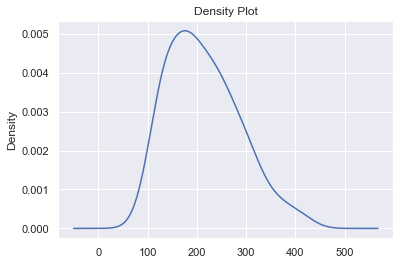

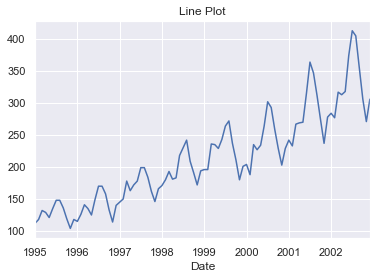

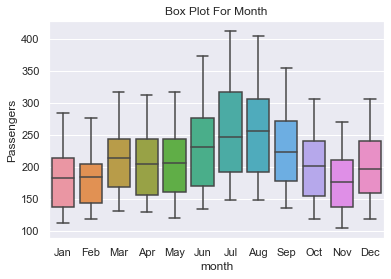

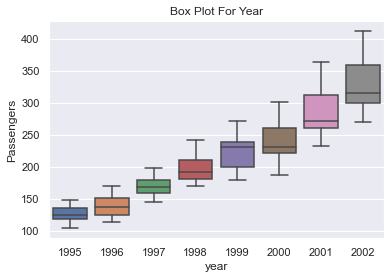

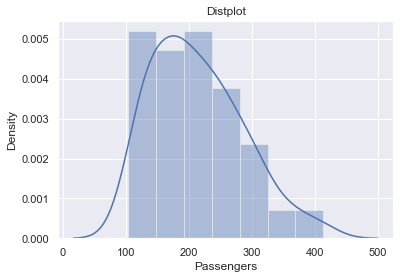

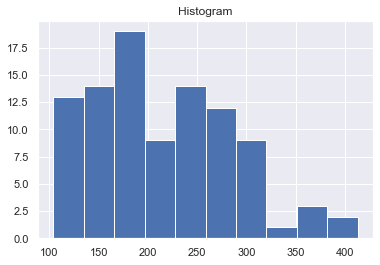

In [141]:
Forecast["Passengers"].plot(kind = "kde")
plt.title("Density Plot")
plt.show()

Forecast["Passengers"].plot()
plt.title("Line Plot")
plt.show()

sns.boxplot(x = "month",y = "Passengers", data = Forecast)
plt.title("Box Plot For Month")
plt.show()
sns.boxplot(x = "year",y = "Passengers", data = Forecast)
plt.title("Box Plot For Year")
plt.show()

sns.distplot(Forecast["Passengers"])
plt.title("Distplot")
plt.show()

Forecast["Passengers"].hist()
plt.title("Histogram")
plt.show()

## <font color= red> HEATMAP:-</font>

<AxesSubplot:xlabel='month', ylabel='year'>

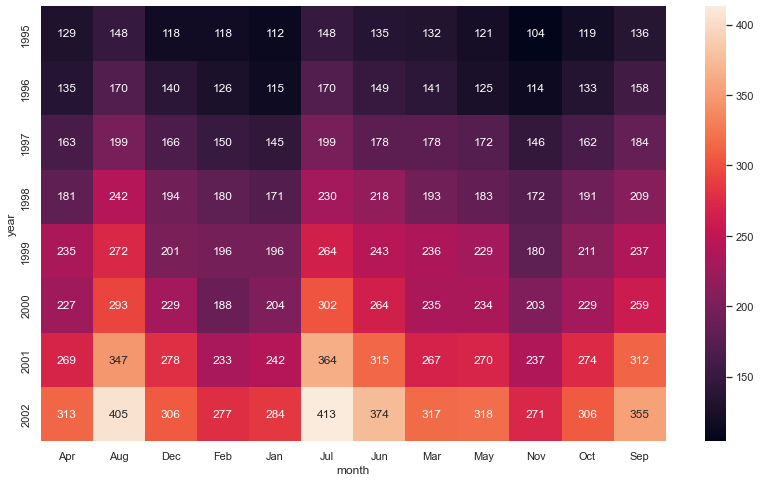

In [135]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=Forecast,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

### <font color= red> ACF AND PACF PLOTS:-</font>

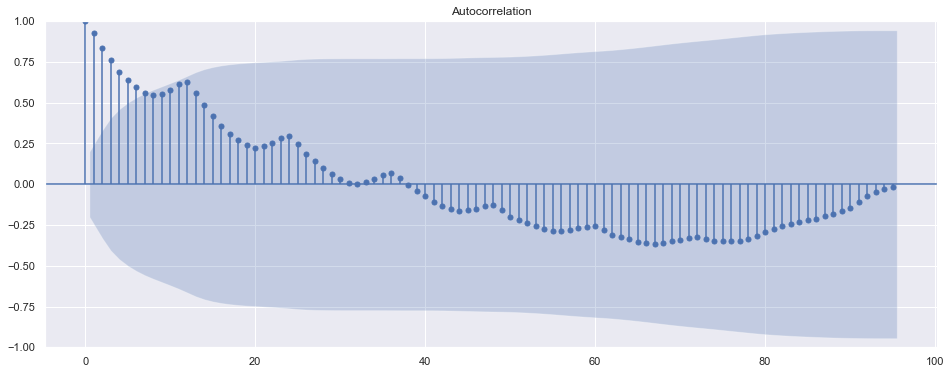

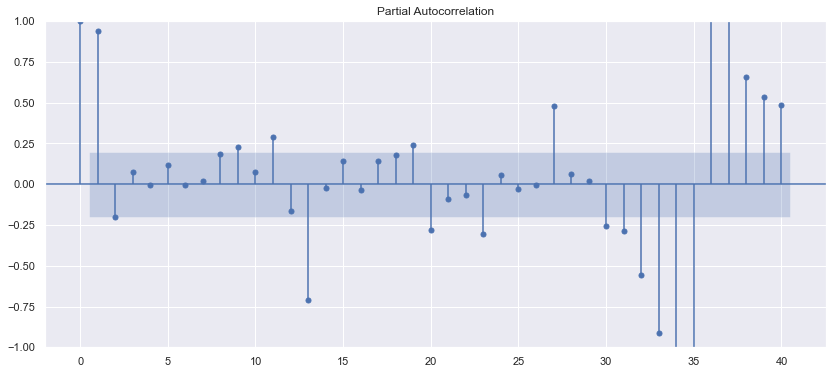

In [142]:
import statsmodels.graphics.tsaplots as tsa_plots

# ACF PLOT:- 

with plt.rc_context():
    plt.rc("figure", figsize=(16,6))
    tsa_plots.plot_acf(Forecast["Passengers"],lags=95)
    plt.show()
    
# PACF PPLOT:- 

with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(Forecast["Passengers"],lags=40)
    plt.show()

### <font color= red> LAG PLOT:-</font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag Plot')

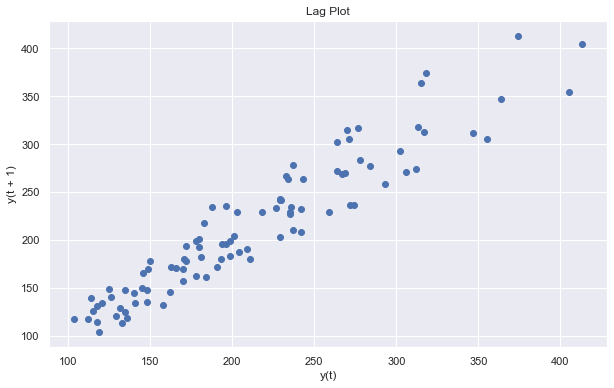

In [143]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(Forecast["Passengers"])
plt.title("Lag Plot")

### Log Transformation On Dependent Variable Column. 

In [145]:
Forecast["Passengers_log"] = np.log(Forecast["Passengers"])
Forecast["Passengers_sqrt"] = np.sqrt(Forecast["Passengers"])

In [146]:
#Also adding "t" col and "t_squared" columns.
Forecast['t'] = np.arange(1,97)
Forecast['t_squared'] = Forecast['t']**2

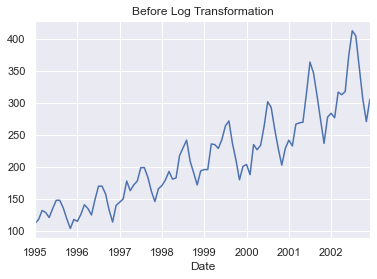

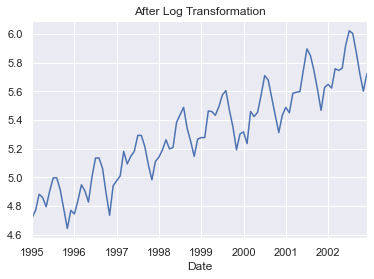

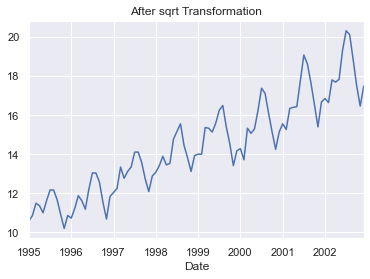

In [147]:
# BEFORE TRANSFORMATION.
Forecast["Passengers"].plot()
plt.title("Before Log Transformation")
plt.show()

# AFTER TRANSFORMATION.
Forecast["Passengers_log"].plot()
plt.title("After Log Transformation")
plt.show()
Forecast["Passengers_sqrt"].plot()
plt.title("After sqrt Transformation")
plt.show()

In [150]:
Forecast

,Passengers,month,year,Passengers_log,Passengers_sqrt,t,t_squared
Date,,,,,,,
1995-01-01,112,Jan,1995,4.718499,10.583005,1,1
1995-02-01,118,Feb,1995,4.770685,10.862780,2,4
1995-03-01,132,Mar,1995,4.882802,11.489125,3,9
1995-04-01,129,Apr,1995,4.859812,11.357817,4,16
1995-05-01,121,May,1995,4.795791,11.000000,5,25
...,...,...,...,...,...,...,...
2002-08-01,405,Aug,2002,6.003887,20.124612,92,8464
2002-09-01,355,Sep,2002,5.872118,18.841444,93,8649
2002-10-01,306,Oct,2002,5.723585,17.492856,94,8836


## <font color= red> DATA SPLITTING.</font>

In [151]:
#70% of data into Train data and rest for Test Data.

size = 68

Train = Forecast.iloc[:size]
Test = Forecast.iloc[size:]

## <font color= red>  MODEL BUILDING .</font>
### <font color= green>1) Linear Model.</font>

In [152]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  linear_model.predict(pd.DataFrame(Test['t']))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

46.29313442912704

### <font color= green>2) Quadratic Model.</font>

In [153]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = Quad.predict(Test[["t","t_squared"]])
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.133871023368236

### <font color= green>3) Exponential Model.</font>

In [154]:
Exp = smf.ols('Passengers_log~t',data=Train).fit()
pred_Exp = Exp.predict(pd.DataFrame(Test['t']))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.13804602208606

### <font color= green>4) Additive Seasonality Model.</font>

In [155]:
add_sea = smf.ols('Passengers~month',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

123.67857598925593

### <font color= green>5) Additive Seasonality Quadratic Model.</font>

In [156]:
add_sea_Quad = smf.ols('Passengers~t+month',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

33.00989697141561

### <font color= green>6) Multiplicative Seasonality Model.</font>

In [157]:
Mul_sea = smf.ols('Passengers_log~month',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

128.06932233846914

### <font color= green>7) Multiplicative Additive Seasonality  Model.</font>

In [158]:
Mul_Add_sea = smf.ols('Passengers_log~t+month',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

12.300608652803115

### <font color= green>8) ARIMA Model.</font>
#### <font color= green>STEP 1.</font>

In [159]:
Forecast.head()

,Passengers,month,year,Passengers_log,Passengers_sqrt,t,t_squared
Date,,,,,,,
1995-01-01,112,Jan,1995,4.718499,10.583005,1,1
1995-02-01,118,Feb,1995,4.770685,10.862780,2,4
1995-03-01,132,Mar,1995,4.882802,11.489125,3,9
1995-04-01,129,Apr,1995,4.859812,11.357817,4,16
1995-05-01,121,May,1995,4.795791,11.000000,5,25


In [160]:
# Droping the not required columns.
Forecast1 = Forecast.drop(["Passengers_log","Passengers_sqrt","t","t_squared","month","year"], axis=1)
Forecast1.head(4)

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129


#### <font color= green>STEP 2.</font>
#### <font color= darkgreen> MAKING THE DATASET STATIONARY.</font>

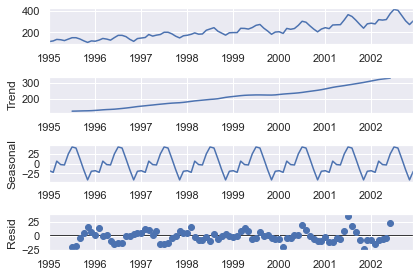

In [161]:
# Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc).

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(Forecast1)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

##### <font color= red> STEP1:- Checking Whether Time-Series is Stationary or Not. .</font>

### Dicky-Fuller Test for Stationarity.
#### Once we have removed trend and seasonality from time-series data then we can test its stationarity using a dicky-fuller test. It's a statistical test to check the stationarity of time-series data.

In [162]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(Forecast1, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  1.3402479596467018
2. P-Value :  0.9968250481137263
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 83
5. Critical Values :
	 1% :  -3.5117123057187376
	 5% :  -2.8970475206326833
	 10% :  -2.5857126912469153


#### We can interpret above results based on p-values of result.<br><br><br>p-value > 0.05 - This implies that time-series is non-stationary.<br>p-value <=0.05 - This implies that time-series is stationary.<br><br>We can see from the above results that p-value is greater than 0.05, hence our time-series is not stationary. It still has time-dependent components present which we need to remove.

##### <font color= red> STEP2:- REMOVING TRENDS AND SEASONALITY. .</font>

#### We can make the dataset stationary by removing trend and seasonality from time series data.<br><br>a} There are various ways to remove trend are as follow:-<br>1)Log Transformation.<br>2)Power Transformation.<br>3)Local smoothing - Applying moving window functions to time-series data<br>Differencing a time-series.<br>Linear Regression,etc.
#### <font color= green> OR We can directly do detrending by using the detrend function from the scipy module.</font>
#### b}There are various ways to remove seasonality are as follow:-<br>1)Average de-trended values.<br>2)Differencing a time-series.<br>3)Use the loss method,etc.
#### <font color= green>OR We can directly use the "seasonal_decompose" function from the "statsmodels" package.</font>

<AxesSubplot:xlabel='Date'>

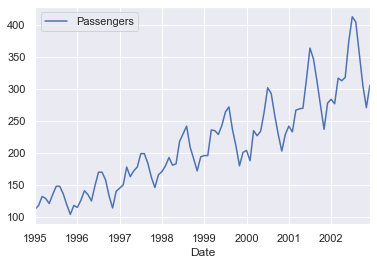

In [163]:
Forecast1.plot()

### Detrending by using the detrend function from the scipy module.

<AxesSubplot:>

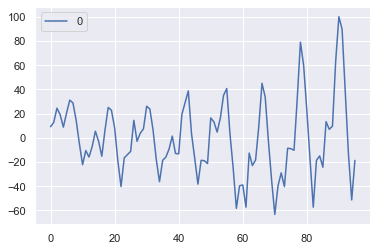

In [164]:
from scipy import signal

detrended = signal.detrend(Forecast1.Passengers)

detrended_df = pd.DataFrame(detrended)
detrended_df.plot()

### Now, Removing seasonality using "seasonal_decompose" function from the "statsmodels" package.

<AxesSubplot:xlabel='Date'>

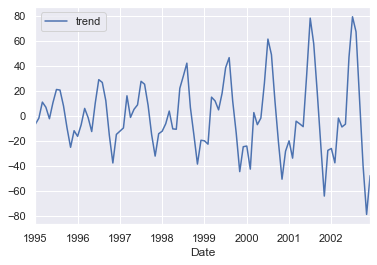

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(Forecast1.Passengers, model='multiplicative', extrapolate_trend='freq')

seasonality = Forecast1.Passengers.values - res.trend

seasonality_Airlines = pd.DataFrame(seasonality )
seasonality_Airlines.plot()

##### <font color= red> STEP3:- AGAIN CHECK WEATHER THE DATASET IS STATIONARY OR NOT. .</font>

In [166]:
# Dicky-Fuller Test For Checking Dataset Is Stationarity Or Not.

dftest = adfuller(seasonality_Airlines.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.9971532479568253
2. P-Value :  0.035161107694788994
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 83
5. Critical Values :
	 1% :  -3.5117123057187376
	 5% :  -2.8970475206326833
	 10% :  -2.5857126912469153


#### We can now test whether our time-series is stationary of now by applying the dicky-fuller test which we had applied above. 

### <font color= green> From our dicky-fuller test results, we can confirm that time-series is STATIONARY due to a p-value of 0.03 less than 0.05.</font>

#### <font color= green>STEP 3.</font>
#### <font color= darkgreen>Splitting the dataset.</font>

In [167]:
seasonality_Airlines.head()

,trend
Date,
1995-01-01,-6.588481
1995-02-01,-1.734169
1995-03-01,11.120144
1995-04-01,6.974456
1995-05-01,-2.171232


In [170]:
seasonality_Airlines.rename(columns = {'trend':'Passengers'}, inplace = True)
seasonality_Airlines.head()

,Passengers
Date,
1995-01-01,-6.588481
1995-02-01,-1.734169
1995-03-01,11.120144
1995-04-01,6.974456
1995-05-01,-2.171232


In [171]:
# separate out a validation dataset

size = int(np.round(len(seasonality_Airlines)*0.70,))

seasonality_Airlines_train = seasonality_Airlines['Passengers'][:size]
seasonality_Airlines_validation = seasonality_Airlines['Passengers'][size:]
print('Dataset %d, Validation %d' % (len(seasonality_Airlines_train), len(seasonality_Airlines_validation)))
seasonality_Airlines.to_csv('seasonality_Airlines_train.csv', header=False)
seasonality_Airlines.to_csv('seasonality_Airlines_validation.csv', header=False)

Dataset 67, Validation 29


#### <font color= green>STEP 4.</font>
#### <font color= darkgreen>ARIMA Hyperparameter Tuning.</font>

In [172]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [173]:
# evaluate combinations of p, d and q values for an ARIMA model:- 


def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [175]:
# load dataset
train = pd.read_csv('seasonality_Airlines_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMA(2, 0, 1) RMSE=19.386


## <font color= red> FINAL MODEL.</font>

In [176]:
# separate out a validation dataset

size = int(np.round(len(seasonality_Airlines_train)*0.70,))

train_data = seasonality_Airlines_train[:size]
test_data = seasonality_Airlines_train[size:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))

Dataset 47, Validation 20


In [177]:
model = ARIMA(train_data,order=(2, 0, 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -179.302
Date:                Fri, 30 Sep 2022   AIC                            368.605
Time:                        01:05:19   BIC                            377.856
Sample:                    01-01-1995   HQIC                           372.086
                         - 11-01-1998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0888      0.317     -0.280      0.780      -0.711       0.533
ar.L1          1.4619      0.114     12.801      0.000       1.238       1.686
ar.L2         -0.8107      0.082     -9.898      0.000      -0.971      -0.650
ma.L1         -0.9999    120.707     -0.008      0.993    -237.581     235.581
sigma2       108.5215   1.31e+04      0.008      0.993   -2.56e+04    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.81   Prob(JB):                         0.57
Heteroskedasticity (H):               1.80   Skew:                            -0.11
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <font color= red> USE MODEL TO PREDICT.</font>

In [181]:
# Obtain predicted values
start=len(train_data)
end=len(seasonality_Airlines_train)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(2,0,1) Predictions')

In [182]:
# Compare predictions to expected values
for i in range(len(test_data)):
    print(f"predicted={predictions[i]:<.20}, expected={test_data[i]}")

predicted=-33.727429269839952042, expected=-19.375
predicted=-18.193410618744390916, expected=-19.833333333333314
predicted=0.71430500101554683656, expected=-22.5
predicted=15.762359666857113538, expected=15.083333333333343
predicted=22.432975845410901172, expected=12.083333333333371
predicted=19.985565114141621734, expected=4.916666666666686
predicted=10.999942673993412967, expected=18.291666666666686
predicted=-0.15207517558221839149, expected=38.666666666666686
predicted=-9.1707363044719301115, expected=46.666666666666686
predicted=-13.314382782490374879, expected=12.041666666666686
predicted=-12.06071498793845187, expected=-13.583333333333343
predicted=-6.8687960629804551971, expected=-44.458333333333314
predicted=-0.29505090242620057861, expected=-24.541666666666686
predicted=5.1061170309535741652, expected=-24.0
predicted=7.6728711251880348243, expected=-42.458333333333314
predicted=7.046580391745087546, expected=2.75
predicted=4.0501833115084444614, expected=-6.916666666666657
p

## <font color= red> MODEL EVALUATION.</font>
#### RMSE (Root Mean Squared Error)

In [183]:
from statsmodels.tools.eval_measures import rmse

rmse_arima = rmse(test_data, predictions)
rmse_arima.round(2)

29.28

## <font color= red> VALIDATION.</font>

In [184]:
#Compare the results 

data = {"MODEL":pd.Series(["Linear Model","Expotential Model","Quadratic Model","Additive Seasonality Model","Additive Seasonality Quadratic Model",
                           "Multiplicative Seasonality Model","Multiplicative Additive Seasonality Model","ARIMA_Model"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima])} 
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,Multiplicative Additive Seasonality Model,12.300609
7,ARIMA_Model,29.276190
4,Additive Seasonality Quadratic Model,33.009897
2,Quadratic Model,42.133871
1,Expotential Model,43.138046
0,Linear Model,46.293134
3,Additive Seasonality Model,123.678576
5,Multiplicative Seasonality Model,128.069322
